In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm 

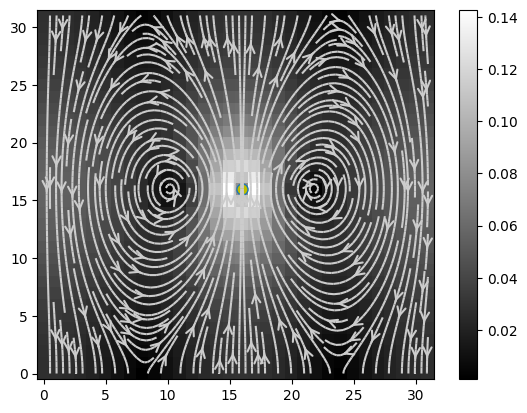

In [2]:
Nx, Ny  = 32, 32   # number of grid points.
a, Np = 2, 1     # number particles.

x, y = np.meshgrid(range(Nx), range(Ny)) ;
r = np.zeros(2*Np); F = np.zeros(2*Np)
fx = np.zeros((Nx, Ny))
fy = np.zeros((Nx, Ny))
Fxk = np.zeros((Nx, Ny), dtype=np.complex128)
Fyk = np.zeros((Nx, Ny), dtype=np.complex128)

# Fourier grid.
kx = 2 * np.pi / Nx * np.concatenate((np.arange(0, Nx/2+1,1),np.arange(-Nx/2+1, 0, 1)))
ky = 2 * np.pi / Ny * np.concatenate((np.arange(0, Nx/2+1,1),np.arange(-Nx/2+1, 0, 1)))
kx, ky = np.meshgrid(kx, ky) 

r[0], r[1] = Nx/2, Ny/2
F[0], F[1] = 0, 1
sigma, a2 = a/3, a*a/6
scale = ( 2 * np.pi * sigma**2 )**(- 2/2)

arg = ( (x - Nx/2)**2 + (y - Ny/2)**2 ) / (2 * sigma**2)
fx0 =  np.exp(-arg) * scale
Fk0 = np.fft.fft2(fx0)

k2 = kx*kx + ky*ky; k2[0, 0] = 1.0

# calculations in Fourier space
for i in range(Np):
    kdotr = kx*(r[i] - Nx/2) + ky*(r[i + Np] -Ny/2) 
    Fxk += Fk0* np.exp(-1j * kdotr)* F[i]      
    Fyk += Fk0* np.exp(-1j * kdotr)* F[i + Np] 

Fdotk = Fxk*kx + Fyk*ky
vxk = (1-a2*k2)*( Fxk - Fdotk*(kx / k2) ) / k2
vyk = (1-a2*k2)*( Fyk - Fdotk*(ky / k2) ) / k2
vxk[0, 0] = 0
vyk[0, 0] = 0

vx = np.real(np.fft.ifft2(vxk))
vy = np.real(np.fft.ifft2(vyk))


## plotting business
plt.figure()
rx = r[0:Np]
ry = r[Np:2*Np]
plt.pcolor(x, y, np.sqrt(vx*vx + vy*vy), cmap=cm.gray)
plt.colorbar()
plt.plot(rx, ry, marker='o', markerfacecolor='y', markersize=8 ) 
plt.streamplot(x, y, vx, vy, density=2, color=[0.8,0.8,0.8], arrowstyle='->', arrowsize =1.5)
plt.show()                                                                                                                                     

